In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
#  Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
# Metrics
from sklearn.metrics import precision_score,accuracy_score,recall_score,confusion_matrix

In [2]:
df = pd.read_csv("data/email.csv")

In [3]:
df.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [4]:
df.shape

(83448, 2)

In [5]:
df["label"].value_counts()

label
1    43910
0    39538
Name: count, dtype: int64

In [6]:
df.isnull().sum()

label    0
text     0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [10]:
stemmer = PorterStemmer()

In [11]:
import string

def transform_text(content : str):
    text = content.lower()
    text = nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(stemmer.stem(i))
    return " ".join(y)

In [12]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [14]:
df['Converted_Text']=df["text"].apply(transform_text)
print(df['text'])

0        ounce feather bowl hummingbird opec moment ala...
1        wulvob get your medircations online qnb ikud v...
2         computer connection from cnn com wednesday es...
3        university degree obtain a prosperous future m...
4        thanks for all your answers guys i know i shou...
                               ...                        
83443    hi given a date how do i get the last date of ...
83444    now you can order software on cd or download i...
83445    dear valued member canadianpharmacy provides a...
83446    subscribe change profile contact us long term ...
83447    get the most out of life ! viagra has helped m...
Name: text, Length: 83448, dtype: object


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [22]:
X = df['Converted_Text'].values
Y = df["label"].values

In [23]:
X = vectorizer.fit_transform(X)

In [24]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2,stratify=Y)

In [27]:
svc = SVC(kernel= "sigmoid", gamma  = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2 )
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)    
xgb  = XGBClassifier(n_estimators = 50, random_state = 2)


In [28]:
clfs = {
    'SVC': svc,
    'KNN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'Adaboost': abc,
    'Bgc': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
    
}

accuracy_score of SVC is 0.9458491866143384
Actual valuse
Accuracy Score 0.9340922708208508
Precision Score 0.9327399729607931
recall Score 0.9427237531314051
accuracy_score of KNN is 0.8542796368974505
Actual valuse
Accuracy Score 0.8054523666866387
Precision Score 0.7314543781885088
recall Score 0.9959007059895241
accuracy_score of NB is 0.9818149135684113
Actual valuse
Accuracy Score 0.9738765727980827
Precision Score 0.9814259344716197
recall Score 0.9686859485310864
accuracy_score of DT is 0.8583840139009556
Actual valuse
Accuracy Score 0.8585979628520072
Precision Score 0.7986421130952381
recall Score 0.9777954907765884
accuracy_score of LR is 0.9859043110938015
Actual valuse
Accuracy Score 0.9808867585380467
Precision Score 0.9715814108993648
recall Score 0.9927123662035983
accuracy_score of RF is 0.9999251026094251
Actual valuse
Accuracy Score 0.9802875973636909
Precision Score 0.9827527127355796
recall Score 0.9797312685037577


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


accuracy_score of Adaboost is 0.9412055483986937
Actual valuse
Accuracy Score 0.9411024565608148
Precision Score 0.9260351797224954
recall Score 0.9651560009109542
accuracy_score of Bgc is 0.9998352257407352
Actual valuse
Accuracy Score 0.9760335530257639
Precision Score 0.9747394653375623
recall Score 0.9798451377818265
accuracy_score of ETC is 0.9999251026094251
Actual valuse
Accuracy Score 0.9814859197124026
Precision Score 0.9866743251005169
recall Score 0.978023229332726
accuracy_score of GBDT is 0.919665058869349
Actual valuse
Accuracy Score 0.91929298981426
Precision Score 0.878448539142828
recall Score 0.9825780004554772
accuracy_score of xgb is 0.9774858443931813
Actual valuse
Accuracy Score 0.971779508687837
Precision Score 0.9563975837451949
recall Score 0.9915736734229105


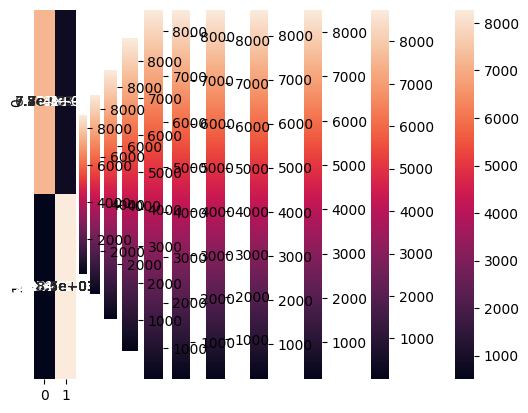

In [29]:
for name,model in clfs.items():
    model.fit(X_train,Y_train)
    y_pred_model = model.predict(X_train)
    print(f"accuracy_score of {name} is {accuracy_score(Y_train,y_pred_model)}")
    y_pred = model.predict(X_test)
    print("Actual valuse")
    print("Accuracy Score",accuracy_score(Y_test,y_pred))
    print("Precision Score",precision_score(Y_test,y_pred))
    print("recall Score",recall_score(Y_test,y_pred))
    sns.heatmap(confusion_matrix(Y_test,y_pred),annot=True)


In [54]:
import joblib

for name,model in clfs.items():
    try:
        joblib.dump(model,f"{name}.pkl")
    except:
        pass
joblib.dump(vectorizer,"vectorizer.pkl")

['transform_text.pkl']

In [48]:
spam = "Dear Winner,Congratulations! You have been selected as the lucky winner of a $1,000 gift card from [Store Name]! This is a limited-time offer, and you must claim your prize within the next 24 hours.To claim your gift card, please click on the link below and provide your details:[Click Here to Claim Your Prize](http://fake-url.com)Don't miss out on this incredible opportunity!Best regards,[Fake Company Name]"
spam_transformed =transform_text(spam)
spam_transformed

'dear winner congratul select lucki winner gift card store name offer must claim prize within next 24 claim gift card pleas click link provid detail click claim prize http miss incred opportun best regard fake compani name'

In [49]:
spam_transformed = vectorizer.transform([spam_transformed])
spam_transformed

<1x247598 sparse matrix of type '<class 'numpy.float64'>'
	with 29 stored elements in Compressed Sparse Row format>

In [50]:
res=etc.predict(spam_transformed)
if res[0] == 0:
    print("Ham")
else:
    print("Spam")

Spam


In [51]:
spam = "Hi [Your Name],I hope this email finds you well. I'm writing to confirm our meeting scheduled for September 5th at 10:00 AM. We will be discussing the Q3 sales report and planning for the upcoming quarter.Please find the agenda attached for your reference.Looking forward to our meeting. Let me know if you need any additional information beforehand.Best regards,[Colleague's Name][Company Name]"
spam_transformed =transform_text(spam)
spam_transformed

'hi name hope email find well write confirm meet schedul septemb 5th discuss q3 sale report plan upcom find agenda attach forward meet let know need addit inform regard colleagu name compani name'

In [52]:
spam_transformed = vectorizer.transform([spam_transformed])
spam_transformed

<1x247598 sparse matrix of type '<class 'numpy.float64'>'
	with 27 stored elements in Compressed Sparse Row format>

In [53]:
res=etc.predict(spam_transformed)
if res[0] == 0:
    print("Ham")
else:
    print("Spam")

Ham


In [55]:
import pickle

# Save the function to a file
with open('text_transform.pkl', 'wb') as f:
    pickle.dump(transform_text, f)
